### Validating GP implementation using python functions

In [22]:
#import GPy
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [6]:
data = np.loadtxt('MINDwizards/Data/data.csv',
          delimiter = ',')

resp = np.resize(data[data[:,0]==1,2], (500,1))
bars = data[data[:,0]==1,3:8]
print(bars.shape)
print(resp.shape)

(500, 5)
(500, 1)


### Validate distance matrix implementation

In [14]:
kernelParameter = 100
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * (1/kernelParameter) * dist.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 100
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T) # (x-x')^2
    return np.exp(-.5 * (1/kernelParameter) * sqdist) # -0.5(1/lambda (lengthscale))

assert(np.all(np.isclose(exponentiated_quadratic(bars,bars),kernel(bars,bars)))) #check that solutions are very close

In [36]:
num_trials = len(resp)
nb_of_samples = num_trials  # Number of points in each function
number_of_functions = 500  # Number of functions to sample

K = exponentiated_quadratic(bars,bars)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=K, 
    size=number_of_functions)

print(np.shape(ys))

(500, 500)


Text(0.5,1,'mean of GP')

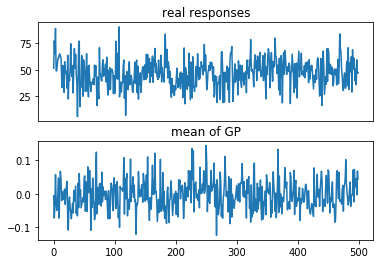

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(resp)
plt.title('real responses')
ax1.get_xaxis().set_visible(False)

ax2 = fig.add_subplot(212)
plt.plot(np.mean(ys,axis=0))
plt.title('mean of GP')